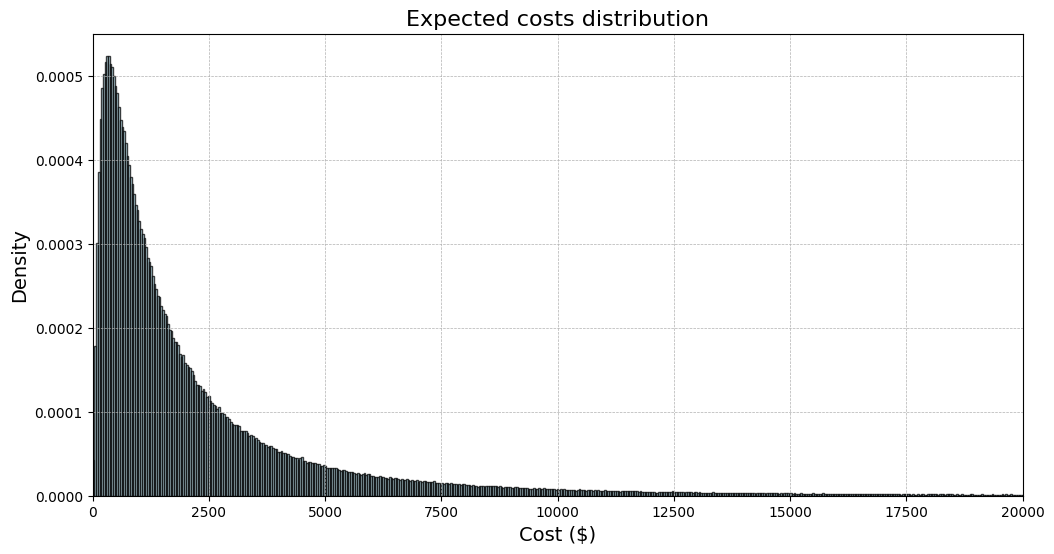

Calculated mean: 2597.66
Calculated median: 1298.04
Calculated sigma: 1.1774
Calculated mu: 7.1701
99th percentile: 20062.60
95th percentile: 9028.22
90th percentile: 5879.23
70th percentile: 2407.20
50th percentile: 1298.04


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set desired values
median_value = 1300  # Target median
mean_to_median_ratio = 2  # Target ratio of mean to median

# Step 2: Calculate sigma based on mean to median ratio
sigma = np.sqrt(2 * np.log(mean_to_median_ratio))

# Step 3: Calculate mu based on the desired median
mu = np.log(median_value)

# Step 4: Generate log-normal distribution
num_samples = 1000000  # Number of samples to generate
expected_distribution = np.random.lognormal(mean=mu, sigma=sigma, size=num_samples)

# Step 5: Create the histogram 
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(expected_distribution, bins=10000, alpha=0.75, color='lightblue', edgecolor='black', density=True)

# Add titles and labels
plt.title('Expected costs distribution', fontsize=16)
plt.xlabel('Cost ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for visual clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis limits to make the graph more focused
plt.xlim([0, 20000])

# Display the improved plot
plt.show()

# Step 6: Print out statistics and percentiles
print(f"Calculated mean: {np.mean(expected_distribution):.2f}")
print(f"Calculated median: {np.median(expected_distribution):.2f}")
print(f"Calculated sigma: {sigma:.4f}")
print(f"Calculated mu: {mu:.4f}")

# Step 7: Calculate and print specified percentiles
percentiles = [99, 95, 90, 70, 50]
percentile_values = np.percentile(expected_distribution, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")


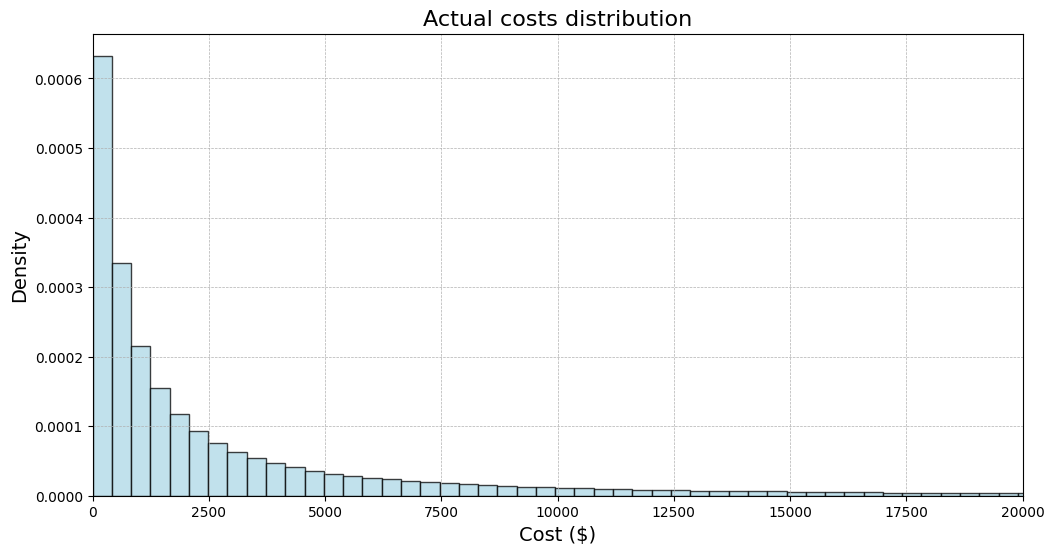

Calculated mean: 6491.12
Calculated median: 1299.22
Calculated sigma: 1.7941
Calculated mu: 7.1701
99th percentile: 84521.05
95th percentile: 24860.10
90th percentile: 12937.81
70th percentile: 3329.13
50th percentile: 1299.22


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set desired values
median_value = 1300  # Target median
mean_to_median_ratio = 5  # Target ratio of mean to median

# Step 2: Calculate sigma based on mean to median ratio
sigma = np.sqrt(2 * np.log(mean_to_median_ratio))

# Step 3: Calculate mu based on the desired median
mu = np.log(median_value)

# Step 4: Generate log-normal distribution
num_samples = 1000000  # Number of samples to generate
actual_cost_distribution = np.random.lognormal(mean=mu, sigma=sigma, size=num_samples)

# Step 5: Create the histogram 
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(actual_cost_distribution, bins=10000, alpha=0.75, color='lightblue', edgecolor='black', density=True)

# Add titles and labels
plt.title('Actual costs distribution', fontsize=16)
plt.xlabel('Cost ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for visual clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis limits to make the graph more focused
plt.xlim([0, 20000])

# Display the improved plot
plt.show()

# Step 6: Print out statistics and percentiles
print(f"Calculated mean: {np.mean(actual_cost_distribution):.2f}")
print(f"Calculated median: {np.median(actual_cost_distribution):.2f}")
print(f"Calculated sigma: {sigma:.4f}")
print(f"Calculated mu: {mu:.4f}")

# Step 7: Calculate and print specified percentiles
percentiles = [99, 95, 90, 70, 50]
percentile_values = np.percentile(actual_cost_distribution, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")


#### Possible check on distribution
https://meps.ahrq.gov/data_files/publications/st533/stat533.shtml

Table 1. Percentile of population ranked by spending and amount spent during the year\
2018 Expenditure Percentiles


| **Percentile of Population** | **Expenditure (\$)**   |
|------------------------------|------------------------|
| Top 1%                        | \$72,212 or more       |
| Top 5%                        | \$26,355 or more       |
| Top 10%                       | \$14,651 or more       |
| Top 30%                       | \$3,776 or more        |
| Top 50%                       | \$1,317 or more        |



### Create a random walk simulation. That takes an expected distribution and models an actual distribution
The simulation takes starting points from the expected probability distribution and takes 52 steps, with the desire being to model a possible actual distribtition.

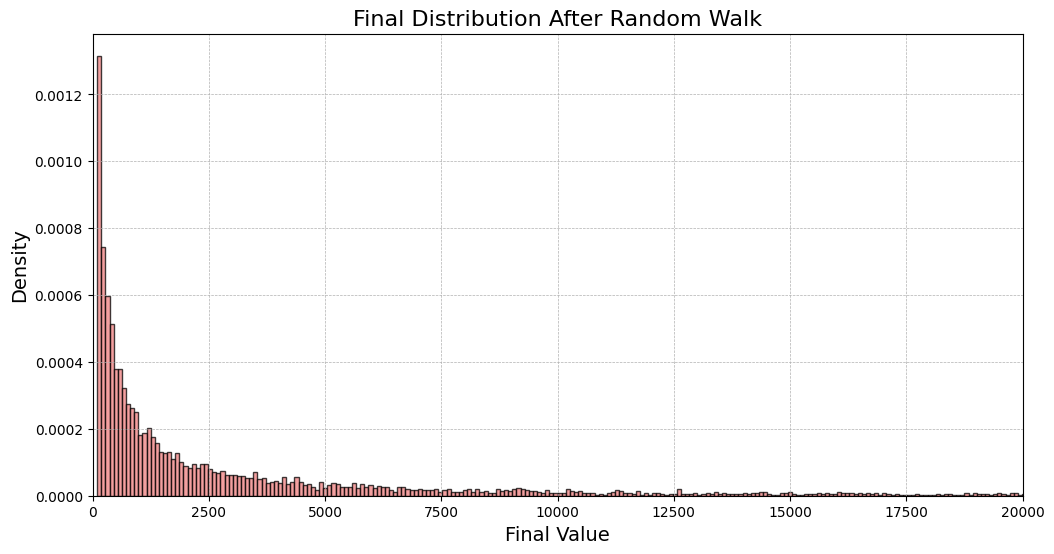

Final mean: 7216.23
Final median: 1270.59
99th percentile: 100459.18
95th percentile: 27977.00
90th percentile: 15108.22
70th percentile: 3449.62
50th percentile: 1270.59


In [45]:
# Set the parameters of the random walk
sample_size = 10000  # Number of random walk simulations
step_mean = .1  # Mean of the step
step_sigma = 1  # Standard deviation of the step size
step_weight = .20 # How much of the current state can be used to step away (expressed as a percentage of current state)
min_value = 100  # Minimum value to avoid zero or negative numbers

# Perform random walk simulation
starting_points = np.random.choice(expected_distribution, size=sample_size, replace=False)
num_steps = 52  # Number of steps for the random walk
final_values = np.zeros(sample_size)

for i in range(sample_size):
    position = starting_points[i]
    for x in range(num_steps):
        # Random step fluctuation
        step_direction = np.random.normal(loc=step_mean, scale=step_sigma)
        # Update position with a multiplicative random walk
        #print("Position: ", position)
        #print("Step direction: ", step_direction)
        #print("Step size: ", (step_direction * (step_weight*position)))
        position += (step_direction * (step_weight*position))
        #print("New position: ", position)

        # Prevent position from dropping below the minimum value
        if position < min_value:
            position = min_value
    final_values[i] = position  # Store the final position after 52 steps

# Step 7: Create a histogram of the final distribution
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(final_values, bins=10000, alpha=0.75, color='lightcoral', edgecolor='black', density=True)

# Add titles and labels
plt.title('Final Distribution After Random Walk', fontsize=16)
plt.xlabel('Final Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for visual clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis limits to focus on the distribution
plt.xlim([0, 20000])

# Display the plot
plt.show()

# Step 8: Print statistics and percentiles of the final distribution
print(f"Final mean: {np.mean(final_values):.2f}")
print(f"Final median: {np.median(final_values):.2f}")

# Calculate and print specified percentiles
percentiles = [99, 95, 90, 70, 50]
percentile_values = np.percentile(final_values, percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")


Calculated mean: 6491.12
Calculated median: 1299.22
Calculated sigma: 1.7941
Calculated mu: 7.1701
99th percentile: 84521.05
95th percentile: 24860.10
90th percentile: 12937.81
70th percentile: 3329.13
50th percentile: 1299.22

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters of the random walk
sample_size = 1  # Only perform one simulation interactively
step_mean = .1  # Mean of the step
step_sigma = 1  # Standard deviation of the step size
step_weight = .20  # How much of the current state can be used to step away
min_value = 100  # Minimum value to avoid zero or negative numbers

# Perform random walk simulation
starting_points = np.random.choice(expected_distribution, size=sample_size, replace=False)
num_steps = 52  # Number of steps for the random walk
final_values = np.zeros(sample_size)

for i in range(sample_size):
    position = starting_points[i]
    print(f"Starting position: {position:.2f}")
    
    for x in range(num_steps):
        input(f"Press Enter to proceed to step {x + 1}")
        
        # Random step fluctuation
        step_direction = np.random.normal(loc=step_mean, scale=step_sigma)
        
        # Update position with a multiplicative random walk
        step_size = step_direction * (step_weight * position)
        position += step_size
        
        print(f"Step {x + 1}:")
        print(f"Step direction: {step_direction:.2f}")
        print(f"Step size: {step_size:.2f}")
        print(f"New position: {position:.2f}")
        
        # Prevent position from dropping below the minimum value
        if position < min_value:
            position = min_value
            print(f"Position adjusted to minimum value: {min_value:.2f}")
        
        print("-" * 40)
    
    final_values[i] = position  # Store the final position after 52 steps
    print(f"Final position after {num_steps} steps: {position:.2f}")

# After completing the interactive run, plot the result

# Step 7: Create a histogram of the final distribution (even though there's just one value for now)
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(final_values, bins=10000, alpha=0.75, color='lightcoral', edgecolor='black', density=True)

# Add titles and labels
plt.title('Final Distribution After Random Walk', fontsize=16)
plt.xlabel('Final Value', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for visual clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis limits to focus on the distribution
plt.xlim([0, 20000])

# Display the plot
plt.show()

# Step 8: Print statistics and percentiles of the final distribution
print(f"Final mean: {np.mean(final_values):.2f}")
print(f"Final median: {np.median(final_values):.2f}")
